In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from getData import *


neuron_IDs = getNeuronMatrix('net_10000')

In [16]:
chin_color='xkcd:orange'
ispn_color='xkcd:blue purple'
lts_color='xkcd:bright purple'
dspn_color='xkcd:sky blue'
fs_color='xkcd:dark blue'
import matplotlib.ticker as ticker


def ComputeFiringRatesNEST(senders, times, neuron_IDs):

    dspn_spks = []
    ispn_spks = []
    lts_spks = []
    chin_spks = []
    fs_spks = []
    
    dspn_ID, ispn_ID, lts_ID, fs_ID, chin_ID = getNeuronSubMatrixes(neuron_IDs)


    for i in range(0, len(senders)):
        if senders[i] in dspn_ID:
            dspn_spks.append(times[i])
        elif senders[i] in ispn_ID:
            ispn_spks.append(times[i])
        elif senders[i] in chin_ID:
            chin_spks.append(times[i])
        elif senders[i] in lts_ID:
            lts_spks.append(times[i])
        elif senders[i] in fs_ID:
            fs_spks.append(times[i])

    dspn_spikes_dt = []
    ispn_spikes_dt = []
    chin_spikes_dt = []
    lts_spikes_dt = []
    fs_spikes_dt = []

    for d_time in range (0, 1981, 20):

        start = d_time
        stop = d_time + 20
        spikes_dt_aux = [0,0,0,0,0]

        for elem in dspn_spks:
            if (start < elem <= stop):
                spikes_dt_aux[0] +=1
        for elem in ispn_spks:
            if (start < elem <= stop):
                spikes_dt_aux[1] +=1
        for elem in chin_spks:
            if (start < elem <= stop):
                spikes_dt_aux[2] +=1
        for elem in lts_spks:
            if (start < elem <= stop):
                spikes_dt_aux[3] +=1
        for elem in fs_spks:
            if (start < elem <= stop):
                spikes_dt_aux[4] +=1

        dspn_spikes_dt.append(spikes_dt_aux[0])
        ispn_spikes_dt.append(spikes_dt_aux[1])
        chin_spikes_dt.append(spikes_dt_aux[2])
        lts_spikes_dt.append(spikes_dt_aux[3])
        fs_spikes_dt.append(spikes_dt_aux[4])
        
    N_dspn = len(dspn_ID)
    N_ispn = len(ispn_ID)
    N_chin = len(chin_ID)
    N_lts= len(lts_ID)
    N_fs = len(fs_ID)

    dspn_fr = []
    ispn_fr = []
    chin_fr = []
    lts_fr = []
    fs_fr = []

    for elem in dspn_spikes_dt:
        dspn_fr.append(elem*50/(N_dspn))
    for elem in ispn_spikes_dt:
        ispn_fr.append(elem*50/(N_ispn))
    for elem in chin_spikes_dt:
        chin_fr.append(elem*50/(N_chin))
    for elem in lts_spikes_dt:
        lts_fr.append(elem*50/(N_lts))
    for elem in fs_spikes_dt:
        fs_fr.append(elem*50/(N_fs))

    time = []
    for d_time in range (0, 1981, 20):
        time.append(d_time)

    return(time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr)

def plotFRNEST(senders, times, neuron_IDs):
    
    time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr = ComputeFiringRatesNEST(senders, times, neuron_IDs)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axes.xaxis.set_visible(False)
    plt.ylim(0, 50)
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    plt.step(time, lts_fr, color = lts_color, linewidth=0.5)
    plt.step(time, chin_fr, color = chin_color, linewidth=0.5)
    plt.step(time, fs_fr, color = fs_color, linewidth=0.5)
    plt.step(time, dspn_fr, color = dspn_color, linewidth=1)
    plt.step(time, ispn_fr, color = ispn_color, linewidth=1)
    
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(' Firing Rate [Hz]')

    plt.show()
    
    #------------------------------------------------------------#
    fig1 = plt.figure()
    ax1 = fig1.add_axes([0,0,1,1])
    ax1.axes.xaxis.set_visible(False)
    plt.ylim(0, 50)
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
   
    plt.step(time, lts_fr, color = lts_color, linewidth=0.5)
    plt.step(time, chin_fr, color = chin_color, linewidth=0.5)
    plt.step(time, fs_fr, color = fs_color, linewidth=0.5)
    
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel(' Firing Rate [Hz]')
    
    plt.show()
    
    #------------------------------------------------------------#    
    fig2 = plt.figure()
    ax2 = fig2.add_axes([0,0,1,1])
    ax2.axes.xaxis.set_visible(False)
    plt.ylim(0, 50)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))    
    plt.step(time, dspn_fr, color = dspn_color, linewidth=1)
    plt.step(time, ispn_fr, color = ispn_color, linewidth=1)
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel(' Firing Rate [Hz]')
    
    plt.show()
    
    return

def RasterNEST(evs,ts, neuron_IDs):
    spikes = {}
    for i in range(0, len(evs)) :

        nID = evs[i]
        spike_time = ts[i]
        if(nID not in spikes.keys()):
            spikes[nID] = []            
        spikes[nID].append(spike_time)

    for i in range(0, 10000):
        if(i not in spikes.keys()):
            spikes[i] = []

    n_ids = np.array(list(spikes.keys()), dtype=int)
    n_ids.sort() #organize the neurons by id

    dspn_ID, ispn_ID, lts_ID, fs_ID, chin_ID = getNeuronSubMatrixes(neuron_IDs)

    orderedIDs = getOrderedIDs(dspn_ID, ispn_ID, lts_ID, fs_ID, chin_ID)


    fig_handle = plt.figure()
    fig, ax = plt.subplots(1,1)
    ax = fig_handle.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.set_xlabel('$t$ (ms)')
    ax.axes.yaxis.set_visible(False)


    plotSpikes(spikes, fs_ID, orderedIDs, fs_color, 'fs', ax)
    plotSpikes(spikes, dspn_ID, orderedIDs,dspn_color, 'dspn', ax)
    plotSpikes(spikes, lts_ID, orderedIDs, lts_color, 'lts', ax)
    plotSpikes(spikes, ispn_ID, orderedIDs,ispn_color , 'ispn', ax)
    plotSpikes(spikes, chin_ID, orderedIDs, chin_color, 'chin', ax)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    return()

def plotSpikes(events, id_array, raster_order, color, label, ax):
    
    label_done = False
    
    for neuron_id in id_array:
        
        spikes = events[neuron_id] #array of the spike times of neuron i
        
        index = raster_order.index(neuron_id)
        if not label_done:
            ax.plot(spikes, np.full_like(spikes, index), ms = 1, marker=".", label=label, color=color, linestyle="None")

            #this full_like function generates an array that has the same size as events[i], with the value index
            #on every position (so we #have the same number of x and ys for plotting)
            label_done = True
        else:
            ax.plot(spikes, np.full_like(spikes, index), ms = 1, marker=".", color=color, linestyle="None")
    return()

In [12]:
evs_F3_w11 = np.loadtxt('/home/ubuntu/BasalGanglia/evs_F3_w11.csv', delimiter=',')
ts_F3_w11 = np.loadtxt('/home/ubuntu/BasalGanglia/ts_F3_w11.csv', delimiter=',')

evs_G3_w11 = np.loadtxt('/home/ubuntu/BasalGanglia/evs_G3_w11.csv', delimiter=',')
ts_G3_w11 = np.loadtxt('/home/ubuntu/BasalGanglia/ts_G3_w11.csv', delimiter=',')

evs_H3_w11 = np.loadtxt('/home/ubuntu/BasalGanglia/evs_H3_w11.csv', delimiter=',')
ts_H3_w11 = np.loadtxt('/home/ubuntu/BasalGanglia/ts_H3_w11.csv', delimiter=',')

evs_H3_w01 = np.loadtxt('/home/ubuntu/BasalGanglia/evs_H3_w01.csv', delimiter=',')
ts_H3_w01 = np.loadtxt('/home/ubuntu/BasalGanglia/ts_H3_w01.csv', delimiter=',')

evs_H3_w1 = np.loadtxt('/home/ubuntu/BasalGanglia/evs_H3_w1.csv', delimiter=',')
ts_H3_w1 = np.loadtxt('/home/ubuntu/BasalGanglia/ts_H3_w1.csv', delimiter=',')

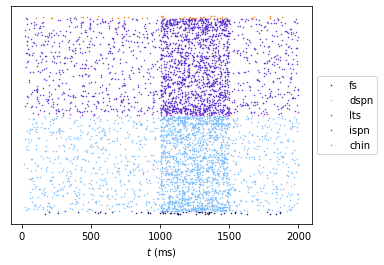

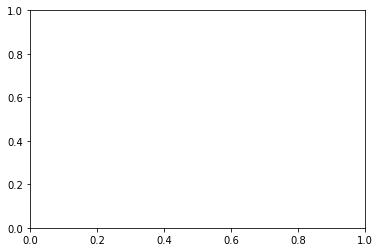

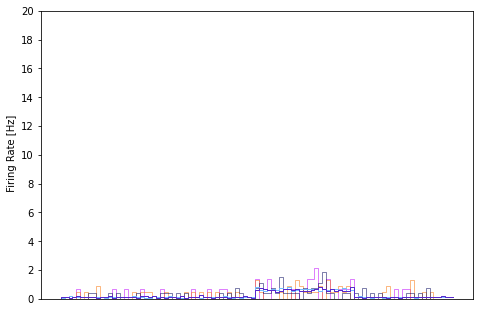

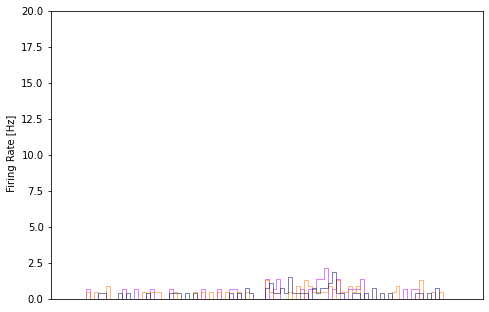

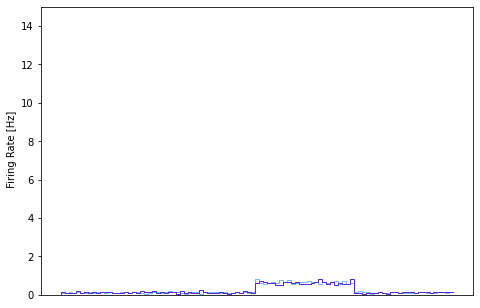

In [8]:
RasterNEST(evs_F3_w11, ts_F3_w11 , neuron_IDs)

plotFRNEST(evs_F3_w11, ts_F3_w11, neuron_IDs)

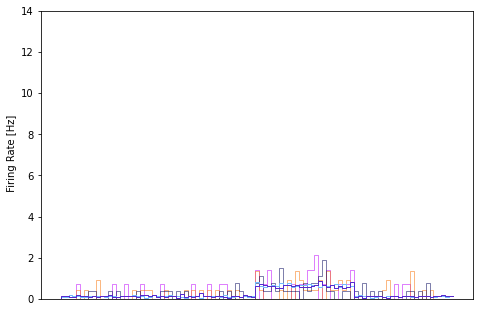

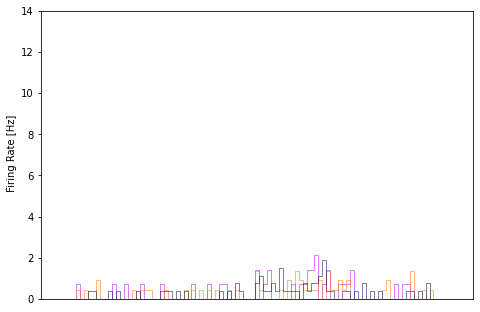

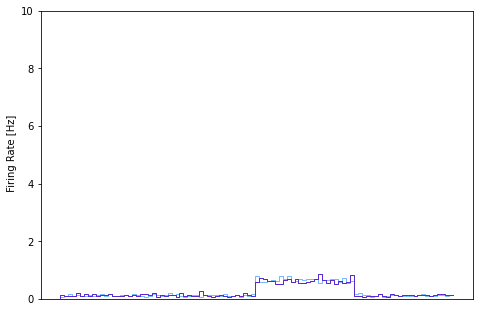

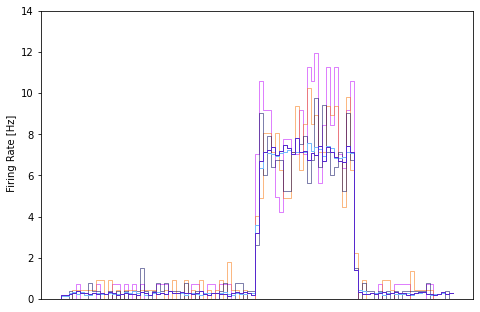

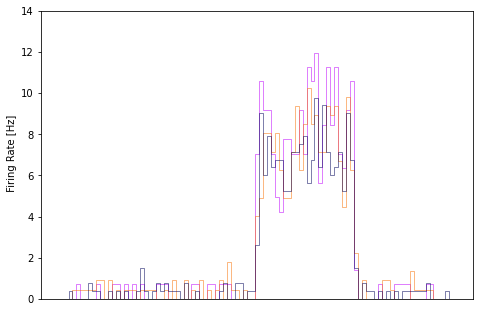

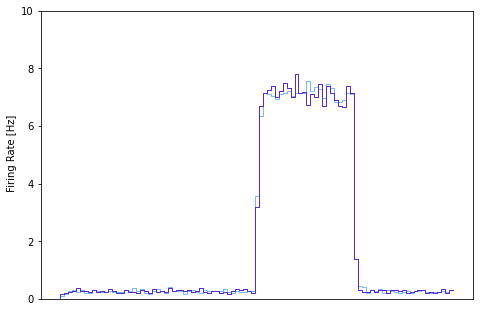

In [10]:
plotFRNEST(evs_F3_w11, ts_F3_w11, neuron_IDs)
plotFRNEST(evs_G3_w11, ts_G3_w11, neuron_IDs)

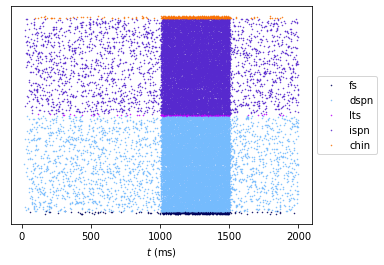

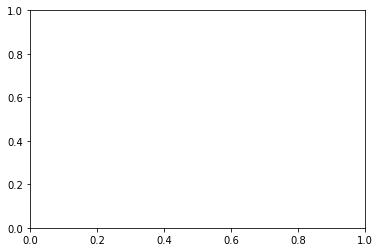

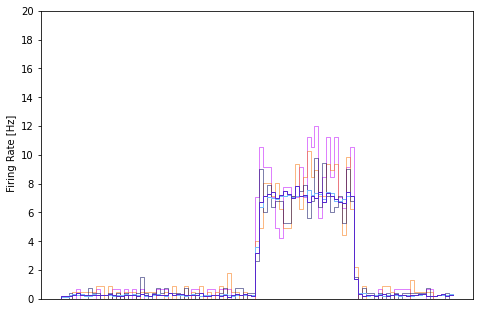

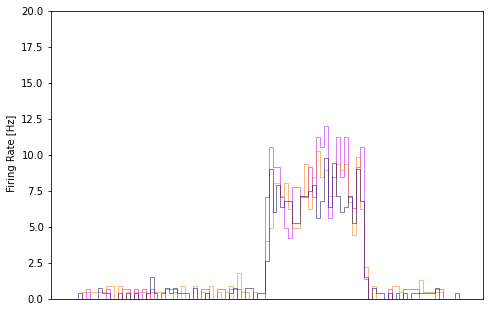

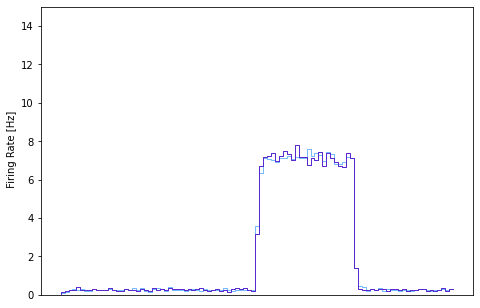

In [6]:
RasterNEST(evs_G3_w11, ts_G3_w11 , neuron_IDs)

plotFRNEST(evs_G3_w11, ts_G3_w11, neuron_IDs)

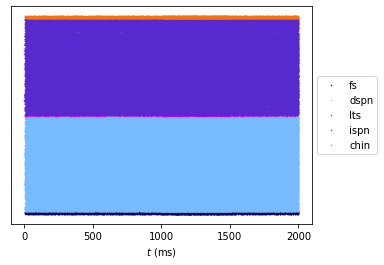

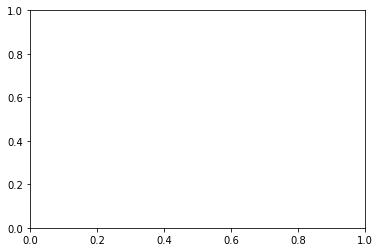

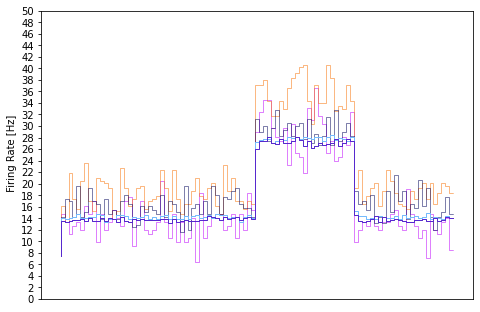

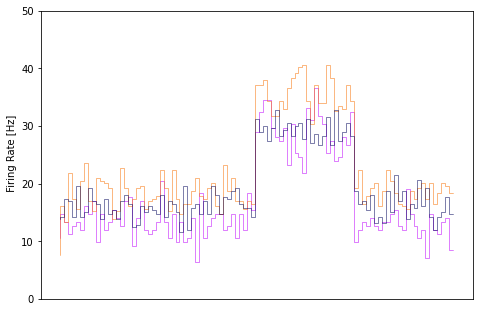

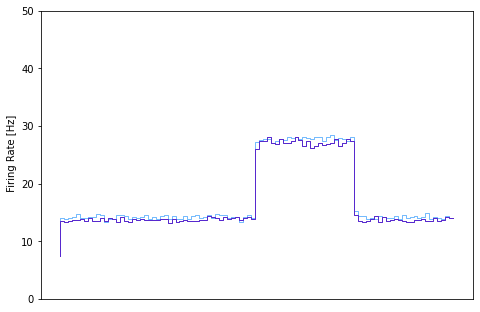

In [17]:
RasterNEST(evs_H3_w11, ts_H3_w11 , neuron_IDs)

plotFRNEST(evs_H3_w11, ts_H3_w11, neuron_IDs)

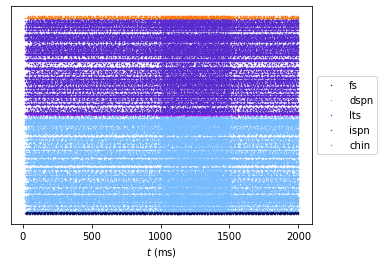

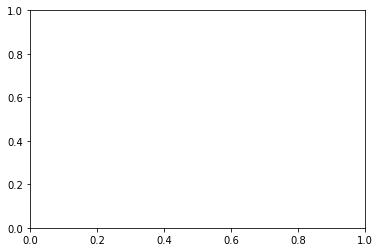

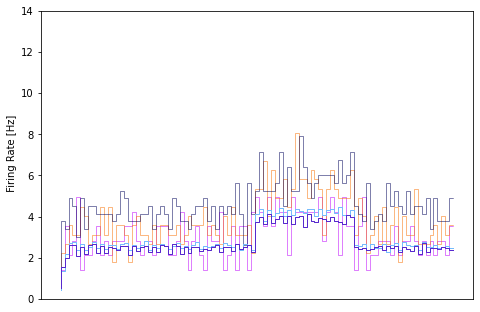

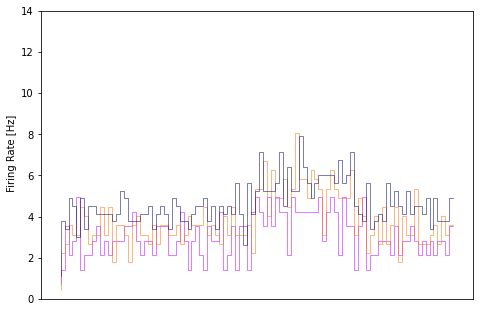

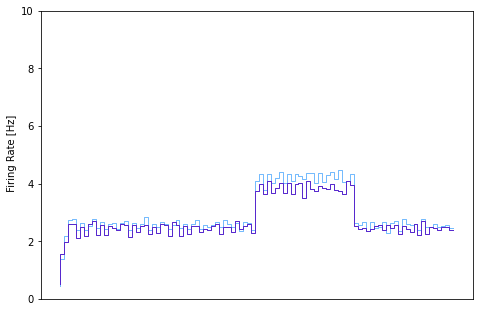

In [15]:
evs_H3_w4 = np.loadtxt('/home/ubuntu/BasalGanglia/evs_H3_w4.csv', delimiter=',')
ts_H3_w4 = np.loadtxt('/home/ubuntu/BasalGanglia/ts_H3_w4.csv', delimiter=',')

RasterNEST(evs_H3_w4, ts_H3_w4 , neuron_IDs)

plotFRNEST(evs_H3_w4, ts_H3_w4, neuron_IDs)